In [16]:
# Get packages 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, explained_variance_score
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from statsmodels.stats.multicomp import pairwise_tukeyhsd
np.random.seed(0)

In [8]:
# Get data 
df = pd.read_csv('data/df_genial.csv') # load data
df = df.fillna(0) # set nan's to 0 
def get_types(df):
    df['year'] = df['year'].astype(int)
    df['Formede træer'] = df['Formede træer'].astype(int)
    df['Gade- og allétræer'] = df['Gade- og allétræer'].astype(int)
    df['Park- og naturtræer'] = df['Park- og naturtræer'].astype(int)
    df['Private træer'] = df['Private træer'].astype(int)
    df['Træer i bevoksninger'] = df['Træer i bevoksninger'].astype(int)
    return df 
df = get_types(df) # change types of columns 
df['year'] = df['year'].astype(int) - 2000 # set 2000 as reference year 

In [9]:
# Model: trees per km2 ~ district + year + district:year
lm = smf.ols(formula='trees_km2 ~ C(district) + year + year:C(district)', data = df)
lm_fit = lm.fit()
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              trees_km2   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     5.610
Date:                Thu, 05 May 2022   Prob (F-statistic):           7.47e-11
Time:                        14:43:33   Log-Likelihood:                -787.47
No. Observations:                 207   AIC:                             1615.
Df Residuals:                     187   BIC:                             1682.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Intercept                                         2.7125      4.815      0.563      0.574      -6.785      12.210
C(district)[T.Amager Øst]                         2.3539      7.057      0.334      0.739     -11.569      16.276
C(district)[T.Bispebjerg]                         5.7614      6.809      0.846      0.399      -7.670      19.193
C(district)[T.Brønshøj-Husum]                    -1.2897      6.809     -0.189      0.850     -14.722      12.142
C(district)[T.Indre By]                           3.2729      6.809      0.481      0.631     -10.159      16.705
C(district)[T.Nørrebro]                           5.9377      6.809      0.872      0.384      -7.494      19.370
C(district)[T.Valby]                             -1.5592      6.809     -0.229      0.819     -14.991      11.873
C(district)[T.Vanløse]                            3.1719      7.272      0.436      0.663     -11.173      17.517
C(district)[T.Vesterbro-Kongens Enghave]         10.1080      6.809      1.485      0.139      -3.324      23.540
C(district)[T.Østerbro]                           0.0314      6.809      0.005      0.996     -13.400      13.463
year                                              0.3441      0.412      0.835      0.405      -0.468       1.157
year:C(district)[T.Amager Øst]                   -0.2730      0.596     -0.458      0.648      -1.449       0.903
year:C(district)[T.Bispebjerg]                   -0.0193      0.582     -0.033      0.974      -1.168       1.130
year:C(district)[T.Brønshøj-Husum]               -0.0978      0.582     -0.168      0.867      -1.247       1.051
year:C(district)[T.Indre By]                      0.0928      0.582      0.159      0.874      -1.056       1.242
year:C(district)[T.Nørrebro]                      1.2585      0.582      2.161      0.032       0.109       2.407
year:C(district)[T.Valby]                         0.4658      0.582      0.800      0.425      -0.683       1.615
year:C(district)[T.Vanløse]                      -0.2650      0.606     -0.437      0.663      -1.461       0.931
year:C(district)[T.Vesterbro-Kongens Enghave]    -0.3264      0.582     -0.560      0.576      -1.475       0.823
year:C(district)[T.Østerbro]                      1.4643      0.582      2.514      0.013       0.315       2.613
==============================================================================
Omnibus:                      108.176   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.197
Skew:                           2.005   Prob(JB):                    2.55e-129
Kurtosis:                      10.252   Cond. No.                         248.
==================================================================

In [10]:
lm_anova = sm.stats.anova_lm(lm_fit, typ=2) # Type 2 partitioning of variance
print(lm_anova) # all variables are significant 

                        sum_sq     df          F        PR(>F)
C(district)        8674.141491    9.0   7.379924  3.445526e-09
year               2581.597762    1.0  19.767714  1.496980e-05
year:C(district)   2793.035295    9.0   2.376303  1.443157e-02
Residual          24421.578826  187.0        NaN           NaN


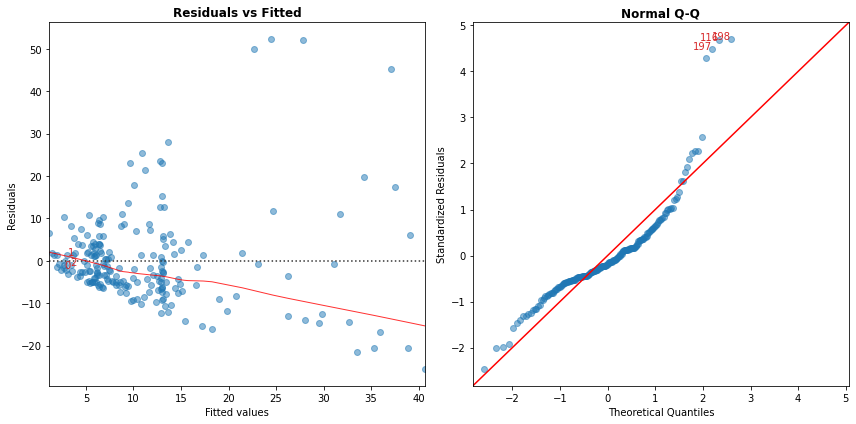

In [11]:
# Looking at the residuals 
diag_lm = Linear_Reg_Diagnostic(lm_fit)
fig, axes = plt.subplots(1,2,figsize=(12,6))
diag_lm.residual_plot(ax=axes[0])
diag_lm.qq_plot(ax=axes[1])
plt.tight_layout()
plt.show()

0.1985693427988897
number of bins:  15


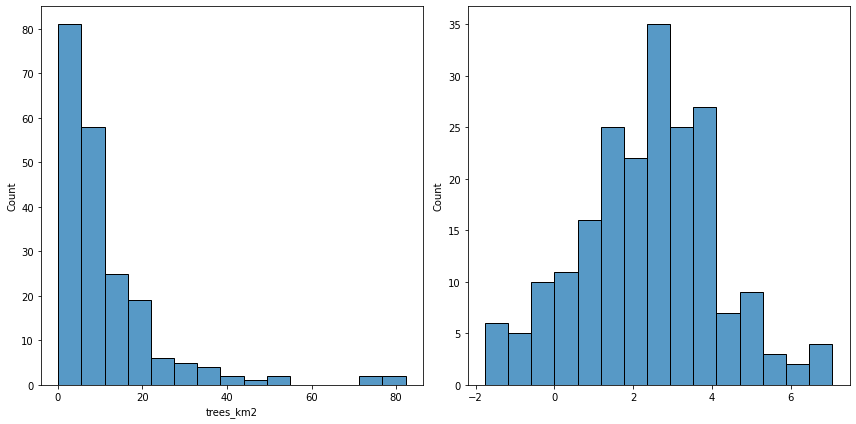

In [12]:
# Histogram of response variable - should be normal distributed for GLM
# Before and after boxcox transformation 
y_transform, lambda_fitted = stats.boxcox(df['trees_km2']) # boxcox transformation
print(lambda_fitted)
nbins = int(np.ceil(np.sqrt(df.shape[0])))
print('number of bins: ', nbins)

fig, axes = plt.subplots(1,2,figsize=(12,6))
sns.histplot(df['trees_km2'], bins = nbins, ax=axes[0])
sns.histplot(y_transform, bins = nbins, ax=axes[1])
plt.tight_layout()
plt.show()

In [19]:
# Model: trees km2 transformed ~ district + year + district:year
df['trees_km2_transform'] = y_transform
scaler = StandardScaler()
df['avg_income_scaled'] = scaler.fit_transform(df['avg_income'].values.reshape(-1,1)) 
lm1 = smf.ols(formula='trees_km2_transform ~ C(district) + year + avg_income_scaled + year:C(district) + avg_income_scaled:C(district)', data = df)
lm_fit1 = lm1.fit()
lm_fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     trees_km2_transform   R-squared:                       0.409
Model:                             OLS   Adj. R-squared:                  0.312
Method:                  Least Squares   F-statistic:                     4.225
Date:                 Thu, 05 May 2022   Prob (F-statistic):           1.05e-09
Time:                         14:46:47   Log-Likelihood:                -356.32
No. Observations:                  207   AIC:                             772.6
Df Residuals:                      177   BIC:                             872.6
Df Model:                           29                                         
Covariance Type:             nonrobust                                         
==============================================================================================================================
                                                                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------
Intercept                                                      6.0009      6.896      0.870      0.385      -7.607      19.609
C(district)[T.Amager Øst]                                      3.8111      9.427      0.404      0.686     -14.792      22.414
C(district)[T.Bispebjerg]                                     -8.4598      8.648     -0.978      0.329     -25.527       8.607
C(district)[T.Brønshøj-Husum]                                  2.4912      8.688      0.287      0.775     -14.655      19.637
C(district)[T.Indre By]                                       -4.3989      7.075     -0.622      0.535     -18.361       9.563
C(district)[T.Nørrebro]                                      -10.9447      9.973     -1.097      0.274     -30.627       8.737
C(district)[T.Valby]                                          -8.1740      9.718     -0.841      0.401     -27.352      11.004
C(district)[T.Vanløse]                                        -8.3633      8.784     -0.952      0.342     -25.699       8.972
C(district)[T.Vesterbro-Kongens Enghave]                       3.5828      9.604      0.373      0.710     -15.370      22.535
C(district)[T.Østerbro]                                        0.0618      7.764      0.008      0.994     -15.260      15.384
year                                                          -0.4194      0.679     -0.617      0.538      -1.760       0.921
year:C(district)[T.Amager Øst]                                -0.2693      0.871     -0.309      0.757      -1.987       1.449
year:C(district)[T.Bispebjerg]                                 0.7220      0.739      0.977      0.330      -0.736       2.180
year:C(district)[T.Brønshøj-Husum]                            -0.1942      0.804     -0.242      0.809      -1.781       1.393
year:C(district)[T.Indre By]                                   0.5824      0.858      0.679      0.498      -1.110       2.275
year:C(district)[T.Nørrebro]                                   1.0101      0.805      1.255      0.211      -0.578       2.598
year:C(district)[T.Valby]                                      0.8318      0.917      0.907      0.366      -0.978       2.642
year:C(district)[T.Vanløse]                                    0.9191      0.949      0.969      0.334      -0.954       2.792
year:C(district)[T.Vesterbro-Kongens Enghave]                 -0.1774      0.911     -0.195      0.846      -1.976       1.621
year:C(district)[T.Østerbro]                                  -0.1612      0.891     -0.181      0.857      -1.919       1.596
avg_income_scaled                                              3.0628      4.287      0.714      0.476      -5.397      11.522
avg_income_scaled:C(dist

In [23]:
lm_anova = sm.stats.anova_lm(lm_fit1, typ=2) # Type 2 partitioning of variance
print(lm_anova) # the interaction is not significant 

                                   sum_sq     df         F        PR(>F)
C(district)                    163.058146    9.0  8.461190  1.768207e-10
year                             0.005906    1.0  0.002758  9.581753e-01
year:C(district)                21.537125    9.0  1.117575  3.525658e-01
avg_income_scaled                1.886162    1.0  0.880867  3.492432e-01
avg_income_scaled:C(district)   19.733745    9.0  1.023996  4.226329e-01
Residual                       379.002265  177.0       NaN           NaN


In [24]:
lm2 = smf.ols(formula='trees_km2_transform ~ C(district) + year + avg_income_scaled + year:C(district)', data = df)
lm_fit2 = lm2.fit()
lm_anova = sm.stats.anova_lm(lm_fit2, typ=2) # Type 2 partitioning of variance
print(lm_anova) # the interaction is not significant 

                       sum_sq     df         F        PR(>F)
C(district)        163.058146    9.0  8.451377  1.490426e-10
year                 1.930470    1.0  0.900514  3.438753e-01
year:C(district)    20.791671    9.0  1.077642  3.812040e-01
avg_income_scaled    1.886162    1.0  0.879846  3.494603e-01
Residual           398.736011  186.0       NaN           NaN


In [25]:
lm3 = smf.ols(formula='trees_km2_transform ~ C(district) + year + avg_income_scaled', data = df)
lm_fit3 = lm3.fit()
lm_anova = sm.stats.anova_lm(lm_fit3, typ=2) # Type 2 partitioning of variance
print(lm_anova) # the interaction is not significant 

                       sum_sq     df         F        PR(>F)
C(district)        163.058146    9.0  8.421200  1.354928e-10
year                 1.930470    1.0  0.897299  3.446795e-01
avg_income_scaled    0.131637    1.0  0.061186  8.048911e-01
Residual           419.527682  195.0       NaN           NaN


In [29]:
lm4 = smf.ols(formula='trees_km2_transform ~ C(district) + year', data = df)
lm_fit4 = lm4.fit()
lm_anova = sm.stats.anova_lm(lm_fit4, typ=2) # Type 2 partitioning of variance
print(lm_anova) # the interaction is not significant 

                 sum_sq     df          F        PR(>F)
C(district)  162.962331    9.0   8.456758  1.196177e-10
year          61.089886    1.0  28.531757  2.541870e-07
Residual     419.659319  196.0        NaN           NaN


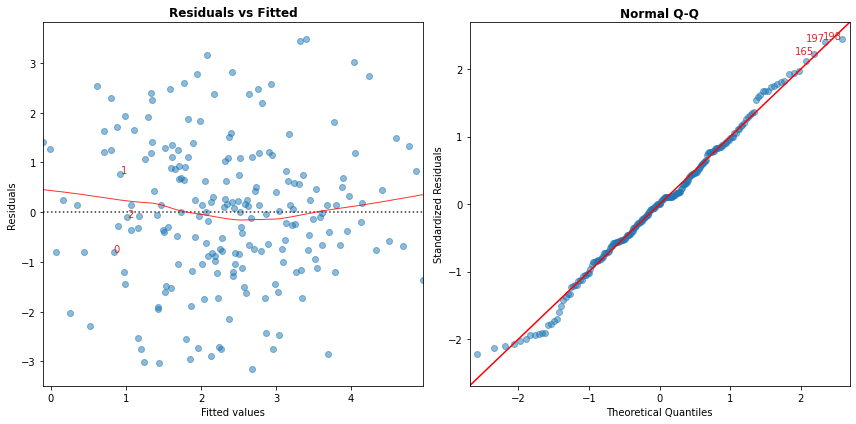

In [30]:
diag_lm4 = Linear_Reg_Diagnostic(lm_fit4)
fig, axes = plt.subplots(1,2, figsize=(12,6))
diag_lm4.residual_plot(ax=axes[0])
diag_lm4.qq_plot(ax=axes[1])
plt.tight_layout()
plt.show()

In [31]:
districts = df.district.unique()
temp = pd.DataFrame(lm_fit4.resid[df['district']==districts[0]].values)
temp1 = pd.DataFrame(lm_fit4.resid[df['district']==districts[1]].values)
temp2 = pd.DataFrame(lm_fit4.resid[df['district']==districts[2]].values)
temp3 = pd.DataFrame(lm_fit4.resid[df['district']==districts[3]].values)
temp4 = pd.DataFrame(lm_fit4.resid[df['district']==districts[4]].values)
temp5 = pd.DataFrame(lm_fit4.resid[df['district']==districts[5]].values)
temp6 = pd.DataFrame(lm_fit4.resid[df['district']==districts[6]].values)
temp7 = pd.DataFrame(lm_fit4.resid[df['district']==districts[7]].values)
temp8 = pd.DataFrame(lm_fit4.resid[df['district']==districts[8]].values)
temp9 = pd.DataFrame(lm_fit4.resid[df['district']==districts[9]].values)
df_res = pd.concat([temp,temp1,temp2,temp3,temp4,temp5,temp6,temp7,temp8,temp9], ignore_index=True, axis=1)
df_res.columns = districts

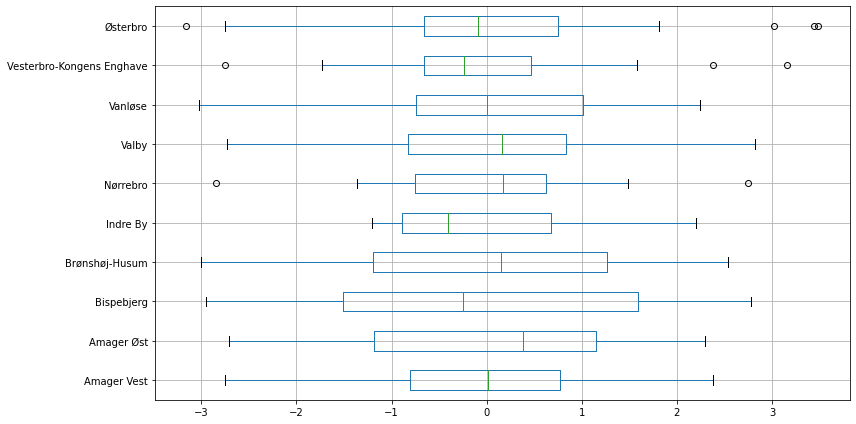

In [311]:
# Check variance of residuals 
districts = df.district.unique()
plt.figure(figsize=(12,6))
df_res.boxplot(vert=False)
#plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [312]:
def plot_tukey(tukey):
    plt.figure(figsize=(12,12))
    rows = tukey.summary().data[1:]
    lower = [row[4] for row in rows]
    upper = [row[5] for row in rows]
    i = 0
    for (l,u) in zip(lower,upper):
        if (l * u) < 0:
            plt.hlines(i,l, u)
        else: 
            plt.hlines(i,l, u, colors='red')
        i = i+1
    plt.vlines( 0, -1, len( rows )-1, linestyles='dashed' )
    plt.gca().set_yticks( range( len( rows ) ) )
    plt.gca().set_yticklabels( [ f'{x[0]}-{x[1]}' for x in rows ] )
    plt.show()

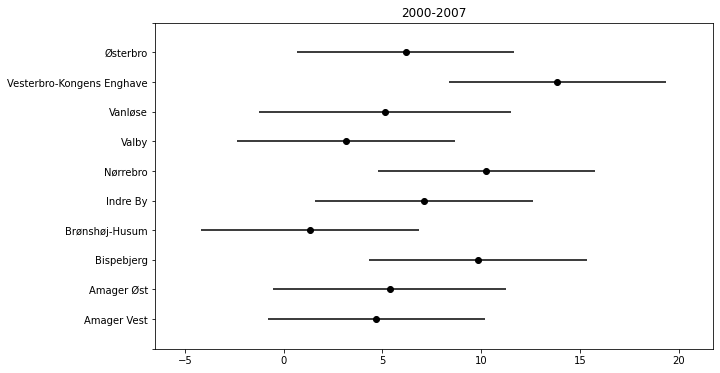

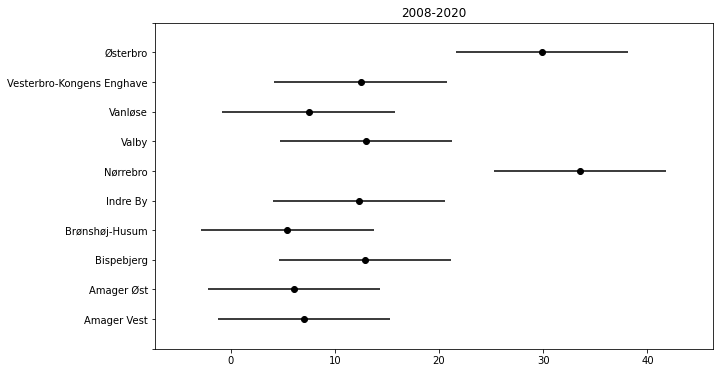

In [313]:
# Turkey's pairwise test to compare means 
df_y1 = df[(df['year']+2000).isin([2000,2001,2002,2003,2004,2005,2006,2007])]
df_y2 = df[(df['year']+2000).isin([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020])]
tukey_y1 = pairwise_tukeyhsd(endog=df_y1['trees_km2'], groups=df_y1['district'], alpha=0.05)
tukey_y2 = pairwise_tukeyhsd(endog=df_y2['trees_km2'], groups=df_y2['district'], alpha=0.05)

tukey_y1.plot_simultaneous()
plt.title('2000-2007')
plt.show()

tukey_y2.plot_simultaneous()
plt.title('2008-2020')
plt.show()

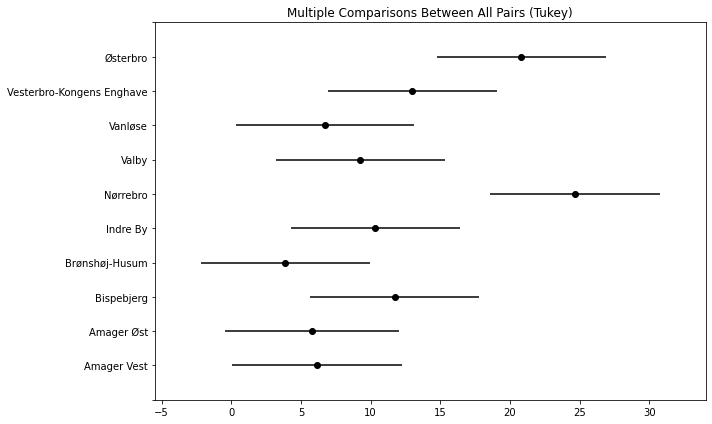

In [315]:
# Overall 
tukey = pairwise_tukeyhsd(endog=df['trees_km2'], groups=df['district'], alpha=0.05)
tukey.plot_simultaneous()
plt.tight_layout()
plt.show()

In [316]:
# Compare models by AIC
y = df['trees_km2']
dy_transform = 1/(y*(1-y**(lambda_fitted)))
log_dy_transform = np.sum(np.log(np.abs(dy_transform)))
loglik = -366.87 + log_dy_transform
AIC = -2*loglik + 2*len(lm_fit2.params)
AIC # better fit as diagnostic plots also tells 

1095.0661729323228

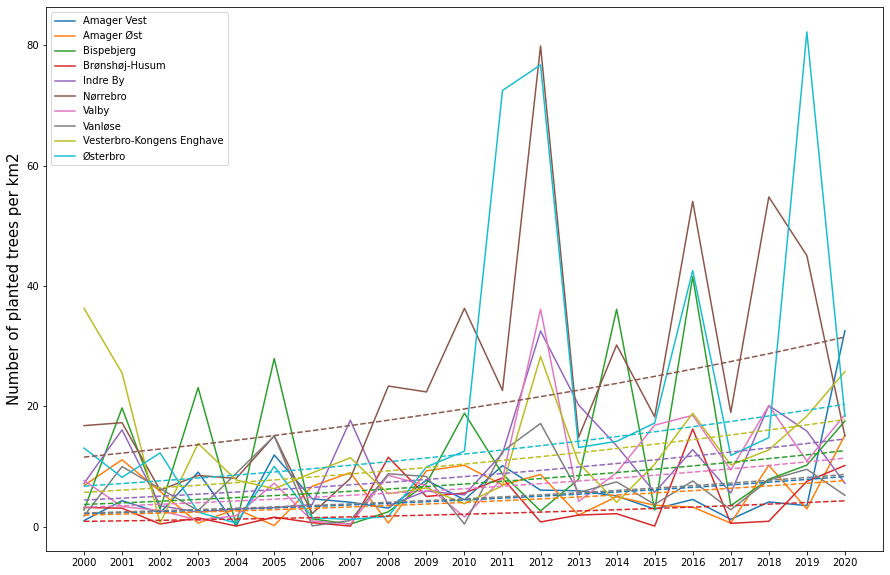

In [317]:
# Plot preditions in original domain
params = lm_fit2.params
cols = [0,1,2,3,4,5,6,7,8,9]
i = 0
plt.figure(figsize=(15,10))
for dist in districts:
    temp = df[df['district'] == dist] 
    plt.plot(temp['year'],temp['trees_km2']) # plot true values

for dist in districts:
    intercept_AV = params.Intercept
    if dist == 'Amager Vest':
        intercept = intercept_AV
    else:
        intercept = intercept_AV + (params[params.keys() == 'C(district)[T.'+str(dist)+']'].values[0])
    temp = df[df['district'] == dist] 
    preds = intercept + params.year*temp['year']
    preds_backtransform = np.power((preds*lambda_fitted + 1),(1/lambda_fitted))
    plt.plot(temp['year'].values,preds_backtransform.values, linestyle='dashed') # plot predictions

plt.legend(districts)
plt.xticks(ticks=temp['year'],labels=temp['year']+2000)
plt.ylabel('Number of planted trees per km2', fontsize=15)
plt.show()

In [ ]:
# plt.figure(figsize=(6,6))
# plt.scatter(lm_fit4.params[1:10].values+lm_fit4.params[0],lm_fit4.params[1:10].index, color=["blue", "green", "cyan", "black", "darkblue", "magenta", "yellow", "orange", "grey"])
# plt.vlines(lm_fit4.params[0],0,8,colors='red')
# plt.yticks(lm_fit4.params[1:10].index, fontsize=12)
# plt.title('Intercept parameters: number of planted trees per km2 in 2000', fontsize=12)
# plt.show()

In [6]:
# base code
import numpy as np
import seaborn as sns
import statsmodels
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type

# base code
style_talk = 'seaborn-talk'    #refer to plt.style.available

class Linear_Reg_Diagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Author:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)

    def __call__(self, plot_context='seaborn-paper'):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(ax=ax[1,1])
            plt.show()

        self.vif_table()
        return fig, ax


    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.sort(residual_abs))
        abs_resid_top_3 = abs_resid[:3]
        for i, _ in enumerate(abs_resid_top_3):
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for r, i in enumerate(abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(np.flip(QQ.theoretical_quantiles, 0)[r], self.residual_norm[i]),
                ha='right', color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')
        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        xtemp, ytemp = self.__cooks_dist_line(0.5) # 0.5 line
        ax.plot(xtemp, ytemp, label="Cook's distance", lw=1, ls='--', color='red')
        xtemp, ytemp = self.__cooks_dist_line(1) # 1 line
        ax.plot(xtemp, ytemp, lw=1, ls='--', color='red')

        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        ax.legend(loc='upper right')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        print(vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y